In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
ticker_data = yf.Ticker('NVDA')
historical_data = ticker_data.history(period='5y')

print(historical_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2020-03-10 00:00:00-04:00  6.390544  6.503638  6.127738  6.503638  580648000   
2020-03-11 00:00:00-04:00  6.363641  6.392039  6.042545  6.139696  499964000   
2020-03-12 00:00:00-04:00  5.616326  5.881873  5.375691  5.388395  816540000   
2020-03-13 00:00:00-04:00  5.741875  6.003934  5.470600  5.999450  634836000   
2020-03-16 00:00:00-04:00  5.291244  5.632269  4.832641  4.892426  726972000   

                           Dividends  Stock Splits  
Date                                                
2020-03-10 00:00:00-04:00        0.0           0.0  
2020-03-11 00:00:00-04:00        0.0           0.0  
2020-03-12 00:00:00-04:00        0.0           0.0  
2020-03-13 00:00:00-04:00        0.0           0.0  
2020-03-16 00:00:00-04:00        0.0           0.0  


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


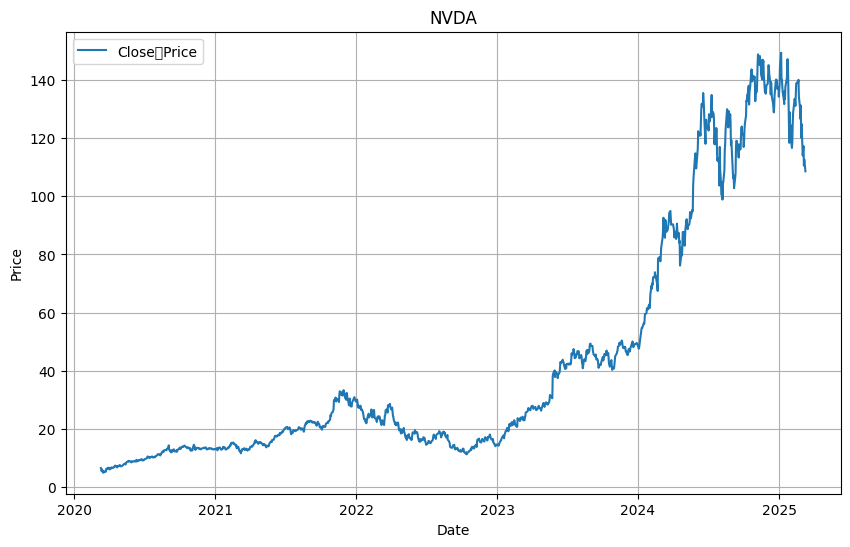

In [3]:
import matplotlib.pyplot as	plt
#	Plotting	the	historical	stock	prices
plt.figure(figsize=(10,	6))
plt.plot(historical_data.index,	historical_data['Close'],	label='Close	Price')
plt.title('NVDA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

In [4]:
import numpy as np
from scipy.special import erf

class BlackScholesModel:
    def __init__(self, spot_price, strike_price, risk_free_rate, volatility, time_to_maturity):
        self.S  = spot_price
        self.K = strike_price
        self.r = risk_free_rate
        self.sigma = volatility
        self.T = time_to_maturity

    def calculate_d1(self):
        numerator = np.log(self.S/self.K) + (self.r + 0.5*self.sigma ** 2) * self.T
        denominator = self.sigma * np.sqrt(self.T)
        return numerator/denominator

    def calculate_d2(self,d1):
        return d1 - self.sigma * np.sqrt(self.T)

    def call_option_price(self):
        d1 = self.calculate_d1()
        d2 = self.calculate_d2(d1)
        option_price = (self.S * self.N(d1)) - (self.K * np.exp(-self.r	* self.T) *	self.N(d2))
        return option_price

    def put_option_price(self):
        d1 = self.calculate_d1()
        d2 = self.calculate_d2(d1)
        option_price = (self.K * np.exp(-self.r * self.T) * self.N(-d2)) - (self.S * self.N(-d1))
        return option_price

    def N(self,x):
        return (1+erf(np.sqrt(2)))/2

#	Next,	we	set	the	parameters	required	for	the	Black-Scholes	model,	such	as	the	spot	price,
#	strike	price,	risk-free	rate,	volatility	and	time	to	maturity.	We	then	create	an	instance
#	of	the	Black-Scholes	model	and	calculate	the	call	and	put	option	prices	based	on	the	given	parameters.

In [5]:
spot_price = 100 # current stock price
strike_price = 100 # option strike price
risk_free_rate = 0.05 # risk free interest rate
volatility = 0.2 # volatility of the underlying stock
time_to_maturity = 1 # time to option maturity in years

bs_model = BlackScholesModel(spot_price, strike_price, risk_free_rate,volatility,time_to_maturity)

call_price = bs_model.call_option_price()
print(call_price)
put_price = bs_model.put_option_price()
print(put_price)

4.766103847148855
-4.766103847148855


In [6]:
# Implementing Monte Carlo simulation
# In this section, we will implement the Monte Carlo simulation for options pricing in Python.
# The Monte	Carlo method is	a powerful tool	for	approximating option prices	and	evaluating complex
# financial	derivatives. We	will showcase its application by calculating call and put option prices
# through Monte	Carlo simulation.

class MonteCarloOptionPricing:
    def __init__(self, spot_price, strike_price, risk_free_rate, volatility, num_simulations, num_steps):
        self.S = spot_price
        self.K = strike_price
        self.r = risk_free_rate
        self.sigma = volatility
        self.T = time_to_maturity
        self.N = num_simulations
        self.M = num_steps

    def generate_price_paths(self):
        dt = self.T/self.M
        price_matrix = np.zeros((self.M + 1, self.N))
        price_matrix[0] = self.S
        for t in range(1, self.M + 1):
            rand_values = np.random.randn(self.N)
            price_matrix[t] = price_matrix[t-1]*np.exp((self.r-0.5*self.sigma**2)*dt + self.sigma*np.sqrt(dt) * rand_values)
        return price_matrix

    def call_option_monte_carlo(self):
        price_matrix = self.generate_price_paths()
        payoffs = np.maximum(price_matrix[-1] - self.K, 0)
        option_price = np.exp(-self.r*self.T)* 1/self.N * np.sum(payoffs)
        return option_price

    def put_option_monte_carlo(self):
        price_matrix = self.generate_price_paths()
        payoffs = np.maximum(self.K - price_matrix[-1], 0)
        option_price = np.exp(-self.r*self.T)* 1/self.N * np.sum(payoffs)
        return option_price

#	Subsequently,	we	create	an	instance	of	the	MonteCarloOptionPricing	class	and	calculate	the	call	and	put
#	option	prices	using	the	Monte	Carlo	simulation	method.

In [7]:
import numpy as np

class MonteCarloOptionPricing:
    def __init__(self, spot_price, strike_price, risk_free_rate, volatility, time_to_maturity, num_simulations, num_steps):
        self.S = spot_price
        self.K = strike_price
        self.r = risk_free_rate
        self.sigma = volatility
        self.T = time_to_maturity
        self.N = num_simulations
        self.M = num_steps

    def generate_price_paths(self):
        dt = self.T / self.M
        price_matrix = np.zeros((self.M + 1, self.N))
        price_matrix[0] = self.S
        for t in range(1, self.M + 1):
            rand_values = np.random.randn(self.N)
            price_matrix[t] = price_matrix[t - 1] * np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * rand_values)
        return price_matrix

    def call_option_monte_carlo(self):
        price_matrix = self.generate_price_paths()
        payoffs = np.maximum(price_matrix[-1] - self.K, 0)
        option_price = np.exp(-self.r * self.T) * 1 / self.N * np.sum(payoffs)
        return option_price

    def put_option_monte_carlo(self):
        price_matrix = self.generate_price_paths()
        payoffs = np.maximum(self.K - price_matrix[-1], 0)
        option_price = np.exp(-self.r * self.T) * 1 / self.N * np.sum(payoffs)
        return option_price


In [8]:
# Define your parameters
spot_price = 100
strike_price = 95
risk_free_rate = 0.05
volatility = 0.2
time_to_maturity = 1.0
num_simulations = 10000
num_steps = 252  # Example value, adjust as needed

# Creating an instance of the Monte Carlo option pricing model
monte_carlo_model = MonteCarloOptionPricing(spot_price, strike_price, risk_free_rate, volatility, time_to_maturity, num_simulations, num_steps)

# Calculating call option price with Monte Carlo simulation
call_price_mc = monte_carlo_model.call_option_monte_carlo()
print("Call Option Price (Monte Carlo):", call_price_mc)

# Calculating put option price with Monte Carlo simulation
put_price_mc = monte_carlo_model.put_option_monte_carlo()
print("Put Option Price (Monte Carlo):", put_price_mc)


Call Option Price (Monte Carlo): 13.29666730111909
Put Option Price (Monte Carlo): 3.6318916530343976


In [9]:
import numpy as np

class AntitheticMonteCarloOptionPricing(MonteCarloOptionPricing):
    def generate_price_paths(self):
        dt = self.T / self.M
        price_matrix = np.zeros((self.M + 1, self.N))
        price_matrix[0] = self.S
        for t in range(1, self.M + 1):
            rand_values = np.random.randn(self.N)
            price_matrix[t, :self.N//2] = price_matrix[t-1, :self.N//2] * np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * rand_values[:self.N//2])
            price_matrix[t, self.N//2:] = price_matrix[t-1, self.N//2:] * np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * (-rand_values[self.N//2:]))
        return price_matrix

# Creating an instance of the Antithetic Monte Carlo option pricing model
antithetic_monte_carlo_model = AntitheticMonteCarloOptionPricing(spot_price, strike_price, risk_free_rate, volatility, time_to_maturity, num_simulations, num_steps)

# Calculating call option price with Antithetic Monte Carlo simulation
call_price_amc = antithetic_monte_carlo_model.call_option_monte_carlo()
print("Call Option Price (Antithetic Monte Carlo):", call_price_amc)

# Calculating put option price with Antithetic Monte Carlo simulation
put_price_amc = antithetic_monte_carlo_model.put_option_monte_carlo()
print("Put Option Price (Antithetic Monte Carlo):", put_price_amc)


Call Option Price (Antithetic Monte Carlo): 13.216045687080287
Put Option Price (Antithetic Monte Carlo): 3.6271780203684987
